Logistic Regression Results:
Accuracy:  0.8133333333333334
F1 Score:  0.0967741935483871
Confusion Matrix: 
 [[482   1]
 [111   6]]
ROC AUC:  0.7701686397338572

K-Nearest Neighbors Results:
Accuracy:  0.805
F1 Score:  0.0
Confusion Matrix: 
 [[483   0]
 [117   0]]
ROC AUC:  0.5634301286475201

Support Vector Machine Results:
Accuracy:  0.8166666666666667
F1 Score:  0.140625
Confusion Matrix: 
 [[481   2]
 [108   9]]
ROC AUC:  0.77301764258286


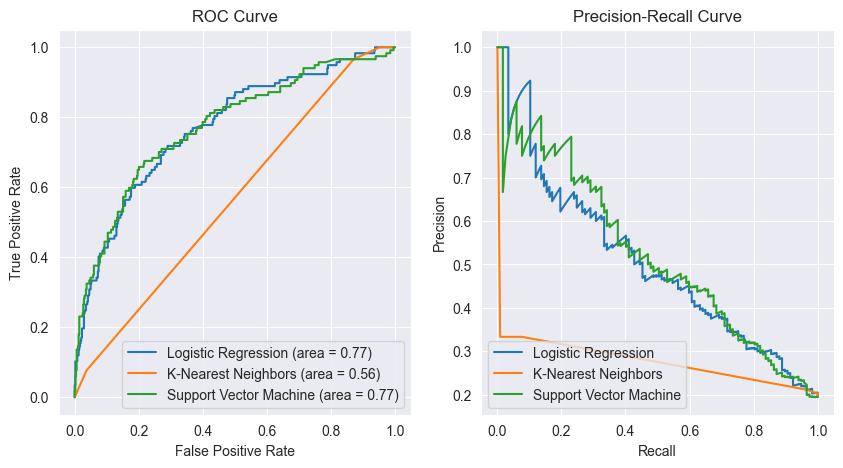

In [ ]:
# Импорт необходимых библиотек
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, roc_auc_score, roc_curve, auc, precision_recall_curve
import matplotlib.pyplot as plt

data = pd.read_csv('Datasets/russian_distorted_toxicity.tsv', delimiter='\t')
X = data['comments']
y_toxic = data['toxicity']
y_distorted = data['distortion']

# Разбивка данных на обучающий и тестовый наборы
X_train, X_test, y_toxic_train, y_toxic_test, y_distorted_train, y_distorted_test = train_test_split(X, y_toxic, y_distorted, test_size=0.2, random_state=42)

# Заменить пропущенные значения на пустые строки
data.fillna('', inplace=True)
# Преобразовать значения в строки
X_train = X_train.astype(str)
X_test = X_test.astype(str)


# Произвести векторизацию текстов с использованием TF-IDF
vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)


# Функция для оценки моделей и построения PR и ROC кривых
def evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)

    fpr, tpr, _ = roc_curve(y_test, model.predict_proba(X_test)[:,1])
    roc_auc = auc(fpr, tpr)

    precision, recall, _ = precision_recall_curve(y_test, model.predict_proba(X_test)[:,1])

    return accuracy, f1, conf_matrix, roc_auc, fpr, tpr, precision, recall

# Логистическая регрессия
logistic_reg_model = LogisticRegression()
accuracy_logistic, f1_logistic, conf_matrix_logistic, roc_auc_logistic, fpr_logistic, tpr_logistic, precision_logistic, recall_logistic = evaluate_model(logistic_reg_model, X_train_tfidf, y_toxic_train, X_test_tfidf, y_toxic_test)

# k-ближайших соседей
knn_model = KNeighborsClassifier(n_neighbors=25)
accuracy_knn, f1_knn, conf_matrix_knn, roc_auc_knn, fpr_knn, tpr_knn, precision_knn, recall_knn = evaluate_model(knn_model, X_train_tfidf, y_toxic_train, X_test_tfidf, y_toxic_test)

# Метод опорных векторов (SVM)
svm_model = SVC(probability=True)
accuracy_svm, f1_svm, conf_matrix_svm, roc_auc_svm, fpr_svm, tpr_svm, precision_svm, recall_svm = evaluate_model(svm_model, X_train_tfidf, y_toxic_train, X_test_tfidf, y_toxic_test)

# Вывод результатов
print("Logistic Regression Results:")
print("Accuracy: ", accuracy_logistic)
print("F1 Score: ", f1_logistic)
print("Confusion Matrix: \n", conf_matrix_logistic)
print("ROC AUC: ", roc_auc_logistic)

print("\nK-Nearest Neighbors Results:")
print("Accuracy: ", accuracy_knn)
print("F1 Score: ", f1_knn)
print("Confusion Matrix: \n", conf_matrix_knn)
print("ROC AUC: ", roc_auc_knn)

print("\nSupport Vector Machine Results:")
print("Accuracy: ", accuracy_svm)
print("F1 Score: ", f1_svm)
print("Confusion Matrix: \n", conf_matrix_svm)
print("ROC AUC: ", roc_auc_svm)

# Построение PR и ROC кривых
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.plot(fpr_logistic, tpr_logistic, label='Logistic Regression (area = %0.2f)' % roc_auc_logistic)
plt.plot(fpr_knn, tpr_knn, label='K-Nearest Neighbors (area = %0.2f)' % roc_auc_knn)
plt.plot(fpr_svm, tpr_svm, label='Support Vector Machine (area = %0.2f)' % roc_auc_svm)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")

plt.subplot(1, 2, 2)
plt.plot(recall_logistic, precision_logistic, label='Logistic Regression')
plt.plot(recall_knn, precision_knn, label='K-Nearest Neighbors')
plt.plot(recall_svm, precision_svm, label='Support Vector Machine')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")

plt.show()

In [ ]:
import pandas as pd

df = pd.read_csv("Datasets/russian_distorted_toxicity.tsv", sep='\t')


# Создайте функцию для заполнения столбца "corrected"
def fill_corrected(row):
    if row['distortion'] == 0:
        return row['comments']  # Не заменять, если уже корректный текст
    else:
        return row['corrected'] if pd.notna(row['corrected']) else row['comments']

# Примените функцию к DataFrame
df['corrected'] = df.apply(fill_corrected, axis=1)

# Выведите обновленный DataFrame
df.head(20)

,comment_id,source,comments,distortion,toxicity,corrected
0,188,медуза,"[id2685300|Максим], а, её уже заставили??ДАННО...",0,0,"[id2685300|Максим], а, её уже заставили??ДАННО..."
1,396,медуза,разасраться с братскими народами и стать на ко...,0,0,разасраться с братскими народами и стать на ко...
2,1014,лентач,три четыре пять шесть семь,0,0,три четыре пять шесть семь
3,1101,лентач,"[id182444802|Роман], уже",0,0,"[id182444802|Роман], уже"
4,197,медуза,всех с 14 февраля,0,0,всех с 14 февраля
5,34,медуза,"[id238092031|?лег], от школоты иного ответа, к...",1,1,"[id238092031|?лег], от школоты иного ответа, к..."
6,2134,дождь,"Я понимаю, что критики Дождя только боты. Но н...",0,0,"Я понимаю, что критики Дождя только боты. Но н..."
7,1191,лентач,"[id554549313|Влад], значит америка признает ку...",0,0,"[id554549313|Влад], значит америка признает ку..."
8,917,медуза,"[id1143480|Дмитрий], ну да, наша так, ""насрать...",1,0,"[id1143480|Дмитрий], ну да, наша так, ""насрать..."
9,2346,дождь,опять высер какого то жида ........... это дли...,0,1,опять высер какого то жида ........... это дли...


In [ ]:
import re

# Создайте функцию для удаления шаблона [id(тут номер)|тут имя] и запятой с пробелом
def remove_id_pattern(text):
    if pd.notna(text):
        return re.sub(r'\[id\d+\|[^\]]+\]\s*,', '', text)
    else:
        return text

# Примените функцию к столбцу "corrected"
df['corrected'] = df['corrected'].apply(remove_id_pattern)

# Выведите обновленный DataFrame
df.head()

,comment_id,source,comments,distortion,toxicity,corrected
0,188,медуза,"[id2685300|Максим], а, её уже заставили??ДАННО...",0,0,"а, её уже заставили??ДАННОЕ СООБЩЕНИЕ (МАТЕРИ..."
1,396,медуза,разасраться с братскими народами и стать на ко...,0,0,разасраться с братскими народами и стать на ко...
2,1014,лентач,три четыре пять шесть семь,0,0,три четыре пять шесть семь
3,1101,лентач,"[id182444802|Роман], уже",0,0,уже
4,197,медуза,всех с 14 февраля,0,0,всех с 14 февраля


In [ ]:
# Удалите столбцы "comment_id", "source" и "comments" из DataFrame
df = df.drop(['comment_id', 'source', 'comments', 'distortion'], axis=1)

In [ ]:
df.head(10)

,toxicity,corrected
0,0,"а, её уже заставили??ДАННОЕ СООБЩЕНИЕ (МАТЕРИ..."
1,0,разасраться с братскими народами и стать на ко...
2,0,три четыре пять шесть семь
3,0,уже
4,0,всех с 14 февраля
5,1,"от школоты иного ответа, кроме как про мамок ..."
6,0,"Я понимаю, что критики Дождя только боты. Но н..."
7,0,"значит америка признает курилы японскими, нич..."
8,0,"ну да, наша так, ""насрать на санкции"", ""дебил..."
9,1,опять высер какого то жида ........... это дли...


In [ ]:
# Удалите все точки и запятые из столбца "corrected"
df['corrected'] = df['corrected'].str.replace('[.,!?"()]', '', regex=True)

# Выведите обновленный DataFrame
df.head(10)

,toxicity,corrected
0,0,а её уже заставилиДАННОЕ СООБЩЕНИЕ МАТЕРИАЛ С...
1,0,разасраться с братскими народами и стать на ко...
2,0,три четыре пять шесть семь
3,0,уже
4,0,всех с 14 февраля
5,1,от школоты иного ответа кроме как про мамок и...
6,0,Я понимаю что критики Дождя только боты Но не ...
7,0,значит америка признает курилы японскими ниче...
8,0,ну да наша так насрать на санкции дебилы блят...
9,1,опять высер какого то жида это длится уже 15г...


In [ ]:
df = df.dropna(subset=['corrected'])

In [ ]:
df.head(20)

,toxicity,corrected
0,0,а её уже заставилиДАННОЕ СООБЩЕНИЕ МАТЕРИАЛ С...
1,0,разасраться с братскими народами и стать на ко...
2,0,три четыре пять шесть семь
3,0,уже
4,0,всех с 14 февраля
5,1,от школоты иного ответа кроме как про мамок и...
6,0,Я понимаю что критики Дождя только боты Но не ...
7,0,значит америка признает курилы японскими ниче...
8,0,ну да наша так насрать на санкции дебилы блят...
9,1,опять высер какого то жида это длится уже 15г...


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

# Разделите данные на признаки (X) и целевую переменную (y)
X = df['corrected']
y = df['toxicity']

# Разделите данные на тренировочный и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Преобразуйте текстовые данные в числовой формат с помощью TF-IDF
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Создайте и обучите модель KNN
knn_classifier = KNeighborsClassifier(n_neighbors=2)  # Выберите подходящее значение для k
knn_classifier.fit(X_train_tfidf, y_train)

# Предсказание на тестовом наборе данных
y_pred = knn_classifier.predict(X_test_tfidf)

# Оцените производительность модели
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Другие метрики
print(classification_report(y_test, y_pred))


Accuracy: 0.83
              precision    recall  f1-score   support

           0       0.83      1.00      0.91       482
           1       0.67      0.02      0.04        98

    accuracy                           0.83       580
   macro avg       0.75      0.51      0.47       580
weighted avg       0.81      0.83      0.76       580


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd


# Разделите данные на признаки (X) и целевую переменную (y)
X = df['corrected']
y = df['toxicity']

# Разделите данные на тренировочный и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Преобразуйте текстовые данные в числовой формат с помощью TF-IDF
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Создайте и обучите модель логистической регрессии
logistic_regression = LogisticRegression()
logistic_regression.fit(X_train_tfidf, y_train)

# Предсказание на тестовом наборе данных
y_pred = logistic_regression.predict(X_test_tfidf)

# Оцените производительность модели
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Другие метрики
print(classification_report(y_test, y_pred))

Accuracy: 0.65
              precision    recall  f1-score   support

           0       0.60      0.76      0.67       107
           1       0.71      0.55      0.62       118

    accuracy                           0.65       225
   macro avg       0.66      0.65      0.65       225
weighted avg       0.66      0.65      0.65       225


In [ ]:
from sklearn.svm import SVC


svm_classifier = SVC()
svm_classifier.fit(X_train_tfidf, y_train)

# Предсказание на тестовом наборе данных
y_pred = svm_classifier.predict(X_test_tfidf)

# Оцените производительность модели
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Другие метрики
print(classification_report(y_test, y_pred))

Accuracy: 0.65
              precision    recall  f1-score   support

           0       0.61      0.73      0.66       107
           1       0.70      0.58      0.63       118

    accuracy                           0.65       225
   macro avg       0.66      0.65      0.65       225
weighted avg       0.66      0.65      0.65       225


In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, roc_curve, auc

# Функция для отрисовки PR-кривой и ROC-AUC-кривой
def plot_pr_roc_curves(y_true, y_scores, title):
    # PR-кривая
    precision, recall, _ = precision_recall_curve(y_true, y_scores)
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.step(recall, precision, color='b', alpha=0.2, where='post')
    plt.fill_between(recall, precision, alpha=0.2, color='b')
    plt.xlabel('Полнота')
    plt.ylabel('Точность')
    plt.title('PR-кривая')

    # ROC-кривая
    fpr, tpr, _ = roc_curve(y_true, y_scores)
    roc_auc = auc(fpr, tpr)
    plt.subplot(1, 2, 2)
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC-кривая (площадь = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('Ложноположительная оценка')
    plt.ylabel('Истинноположительная оценка')
    plt.title('ROC-кривая')
    plt.legend(loc="lower right")

    plt.suptitle(title)
    plt.show()

# Замените эти переменные на результаты соответствующих моделей
y_true = y_test  # Истинные метки
y_scores_lr = logistic_regression.predict_proba(X_test_tfidf)[:, 1]  # Предсказанные вероятности (Логистическая регрессия)
y_scores_knn = knn_classifier.predict_proba(X_test_tfidf)[:, 1]  # Предсказанные вероятности (KNN)
y_scores_svm = svm_classifier.decision_function(X_test_tfidf)  # Решающая функция (SVM)

# Отрисуйте PR-кривую и ROC-кривую для каждой модели
plot_pr_roc_curves(y_true, y_scores_lr, 'Логистическая регрессия')
plot_pr_roc_curves(y_true, y_scores_knn, 'KNN')
plot_pr_roc_curves(y_true, y_scores_svm, 'SVM')


ValueError: X has 6224 features, but KNeighborsClassifier is expecting 6085 features as input.

In [ ]:
from sklearn.metrics import precision_recall_curve, f1_score
import numpy as np


# Предсказанные вероятности для класс 1
y_scores = logistic_regression.predict_proba(X_test_tfidf)[:, 1]

# Получите точность, полноту и пороги для PR-кривой
precision, recall, thresholds = precision_recall_curve(y_test, y_scores)

# Вычислите F1-меру для каждого порога
f1_scores = 2 * (precision * recall) / (precision + recall)

# Найдите порог, при котором F1-мера максимальна
optimal_threshold = thresholds[np.argmax(f1_scores)]

print("Оптимальный порог (PR-кривая):", optimal_threshold)


Оптимальный порог (PR-кривая): 0.23284881829933457


In [ ]:
from sklearn.metrics import roc_curve

# Предсказанные вероятности для класс 1
y_scores = logistic_regression.predict_proba(X_test_tfidf)[:, 1]

# Получите ложноположительную оценку (FPR), истинноположительную оценку (TPR) и пороги для ROC-кривой
fpr, tpr, thresholds = roc_curve(y_test, y_scores)

# Вычислите G-метрику для каждого порога
g_scores = (2 * tpr * (1 - fpr)) / (tpr + (1 - fpr))

# Найдите порог, при котором G-метрика максимальна
optimal_threshold = thresholds[np.argmax(g_scores)]

print("Оптимальный порог (ROC-кривая):", optimal_threshold)


Оптимальный порог (ROC-кривая): 0.20392866762009926


In [ ]:
df['toxicity'].value_counts()

toxicity
0    2336
1     561
Name: count, dtype: int64

In [ ]:
df.head()

,toxicity,corrected
0,0,а её уже заставилиДАННОЕ СООБЩЕНИЕ МАТЕРИАЛ С...
1,0,разасраться с братскими народами и стать на ко...
2,0,три четыре пять шесть семь
3,0,уже
4,0,всех с 14 февраля


In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

# Разделите данные на признаки (X) и целевую переменную (y)
X = df['corrected']
y = df['toxicity']

# Разделите данные на тренировочный и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Создайте TfidfVectorizer и преобразуйте данные
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Примените SMOTE для балансировки классов
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_tfidf, y_train)

# Создайте и обучите модель KNN
knn_classifier = KNeighborsClassifier(n_neighbors=5)  # Выберите подходящее значение для k
knn_classifier.fit(X_train_resampled, y_train_resampled)

# Предсказание на тестовом наборе данных
y_pred = knn_classifier.predict(X_test_tfidf)

# Оцените производительность модели
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Другие метрики
print(classification_report(y_test, y_pred))

Accuracy: 0.82
              precision    recall  f1-score   support

           0       0.82      1.00      0.90       468
           1       0.83      0.09      0.16       112

    accuracy                           0.82       580
   macro avg       0.83      0.54      0.53       580
weighted avg       0.82      0.82      0.76       580


In [ ]:
import numpy as np
# Получите индексы строк с классом 0
class_0_indices = df[df['toxicity'] == 0].index

# Случайным образом выберите 561 индексов из класса 0
class_0_sample_indices = np.random.choice(class_0_indices, 561, replace=False)

# Получите новый датасет, содержащий только выбранные строки
df = df[df.index.isin(class_0_sample_indices) | (df['toxicity'] == 1)]

In [ ]:
df

,toxicity,corrected
5,1,от школоты иного ответа кроме как про мамок и...
9,1,опять высер какого то жида это длится уже 15г...
10,1,Кремлеботы вакцинироваться не хотят уже поэтом...
11,0,все как у Свидетелей Иеговы:
13,1,Хохлы вы и так вымираете какая вам война
...,...,...
2989,1,дебилы это твои родители что тебя родили одно...
2992,0,ну как зачем Это ж сам царь сказал один его ...
2993,1,законы открой долбич
2995,0,


In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Разделите данные на признаки (X) и целевую переменную (y)
X = df['corrected']
y = df['toxicity']

# Разделите данные на тренировочный и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

# Преобразуйте текстовые данные в числовой формат с помощью TF-IDF
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)






# Создайте и обучите модель KNN
knn_classifier = KNeighborsClassifier(n_neighbors=150)
knn_classifier.fit(X_train_tfidf, y_train)

# Предсказание на тестовом наборе данных
knn_y_pred = knn_classifier.predict(X_test_tfidf)

# Оцените производительность модели
knn_accuracy = accuracy_score(y_test, knn_y_pred)
knn_cv_scores = cross_val_score(knn_classifier, X_train_tfidf, y_train, cv=5)
knn_mean_accuracy = knn_cv_scores.mean()
print("KNN")
print("Средняя точность с кросс-валидацией: ", knn_mean_accuracy)
print(f'Accuracy: {knn_accuracy:.2f}')

# Другие метрики
print(classification_report(y_test, knn_y_pred))






# Создайте и обучите модель логистической регрессии
logistic_regression = LogisticRegression()
logistic_regression.fit(X_train_tfidf, y_train)

# Предсказание на тестовом наборе данных
logist_y_pred = logistic_regression.predict(X_test_tfidf)

# Оцените производительность модели
logistic_accuracy = accuracy_score(y_test, logist_y_pred)
logistic_cv_scores = cross_val_score(logistic_regression, X_train_tfidf, y_train, cv=5)
logistic_mean_accuracy = logistic_cv_scores.mean()
print("Logistic Regression")
print("Средняя точность с кросс-валидацией: ", logistic_mean_accuracy)
print(f'Accuracy: {logistic_accuracy:.2f}')

# Другие метрики
print(classification_report(y_test, logist_y_pred))







from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Список всех доступных ядер
kernels = ['linear', 'poly', 'rbf', 'sigmoid']

for kernel in kernels:
    # Создайте SVM классификатор с текущим ядром
    svm_classifier = SVC(kernel=kernel)

    # Обучите модель
    svm_classifier.fit(X_train_tfidf, y_train)

    # Предсказание на тестовом наборе данных
    svm_y_pred = svm_classifier.predict(X_test_tfidf)

    # Оцените производительность модели
    svm_accuracy = accuracy_score(y_test, svm_y_pred)
    svm_cv_scores = cross_val_score(svm_classifier, X_train_tfidf, y_train, cv=5)
    svm_mean_accuracy = svm_cv_scores.mean()
    print(f'SVM с ядром {kernel}')
    print("Средняя точность с кросс-валидацией: ", svm_mean_accuracy)
    print(f'Accuracy: {svm_accuracy:.2f}')
    print(classification_report(y_test, logist_y_pred))

KNN
Средняя точность с кросс-валидацией:  0.5585536933581626
Accuracy: 0.53
              precision    recall  f1-score   support

           0       0.52      0.96      0.67       113
           1       0.71      0.11      0.19       112

    accuracy                           0.53       225
   macro avg       0.61      0.53      0.43       225
weighted avg       0.61      0.53      0.43       225

Logistic Regression
Средняя точность с кросс-валидацией:  0.6710924891371818
Accuracy: 0.68
              precision    recall  f1-score   support

           0       0.66      0.77      0.71       113
           1       0.72      0.60      0.65       112

    accuracy                           0.68       225
   macro avg       0.69      0.68      0.68       225
weighted avg       0.69      0.68      0.68       225
SVM с ядром linear
Средняя точность с кросс-валидацией:  0.6721849782743637
Accuracy: 0.71
              precision    recall  f1-score   support

           0       0.66      0.77

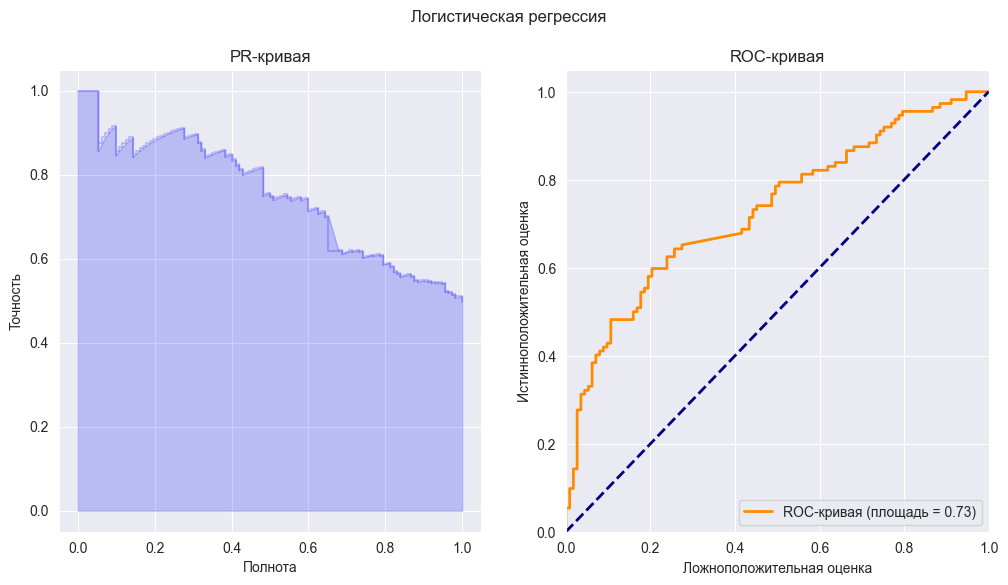

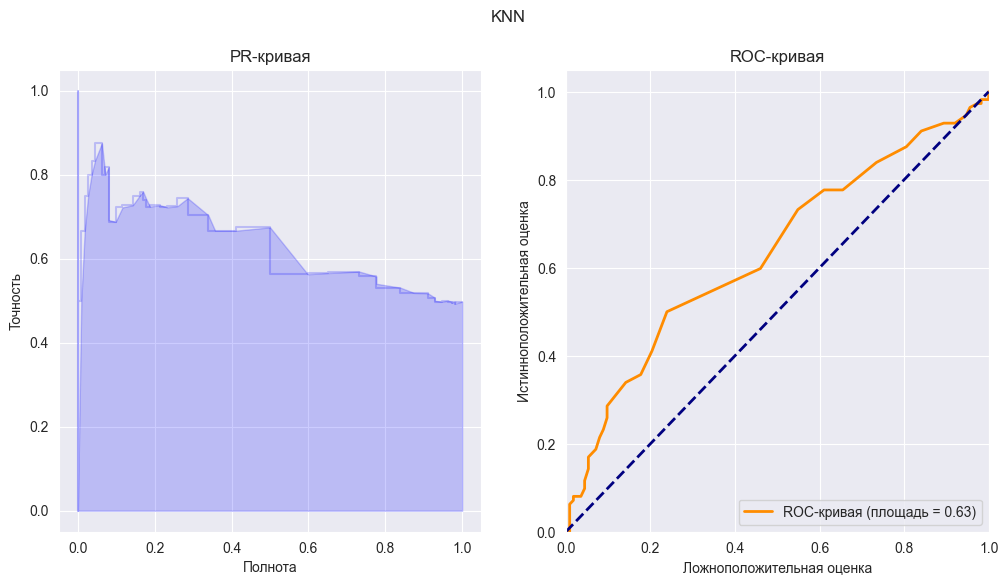

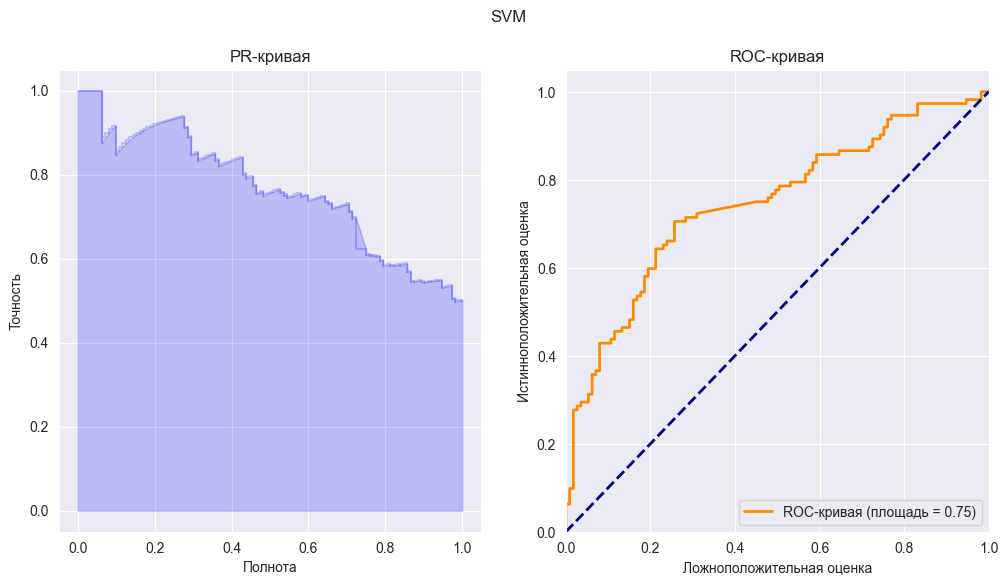

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, roc_curve, auc

# Функция для отрисовки PR-кривой и ROC-AUC-кривой
def plot_pr_roc_curves(y_true, y_scores, title):
    # PR-кривая
    precision, recall, _ = precision_recall_curve(y_true, y_scores)
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.step(recall, precision, color='b', alpha=0.2, where='post')
    plt.fill_between(recall, precision, alpha=0.2, color='b')
    plt.xlabel('Полнота')
    plt.ylabel('Точность')
    plt.title('PR-кривая')

    # ROC-кривая
    fpr, tpr, _ = roc_curve(y_true, y_scores)
    roc_auc = auc(fpr, tpr)
    plt.subplot(1, 2, 2)
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC-кривая (площадь = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('Ложноположительная оценка')
    plt.ylabel('Истинноположительная оценка')
    plt.title('ROC-кривая')
    plt.legend(loc="lower right")

    plt.suptitle(title)
    plt.show()

# Замените эти переменные на результаты соответствующих моделей
y_true = y_test  # Истинные метки
y_scores_lr = logistic_regression.predict_proba(X_test_tfidf)[:, 1]  # Предсказанные вероятности (Логистическая регрессия)
y_scores_knn = knn_classifier.predict_proba(X_test_tfidf)[:, 1]  # Предсказанные вероятности (KNN)
y_scores_svm = svm_classifier.decision_function(X_test_tfidf)  # Решающая функция (SVM)

# Отрисуйте PR-кривую и ROC-кривую для каждой модели
plot_pr_roc_curves(y_true, y_scores_lr, 'Логистическая регрессия')
plot_pr_roc_curves(y_true, y_scores_knn, 'KNN')
plot_pr_roc_curves(y_true, y_scores_svm, 'SVM')


In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Разделите данные на признаки (X) и целевую переменную (y)
X = df['corrected']
y = df['toxicity']

# Разделите данные на тренировочный и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Преобразуйте текстовые данные в числовой формат с помощью TF-IDF
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)

# Определите диапазон значений n_neighbors, которые вы хотите проверить
neighbors_range = range(1, 21)  # Пример: от 1 до 20 соседей

best_accuracy = 0
best_n_neighbors = 0

# Переберите разные значения n_neighbors и выберите лучший
for n_neighbors in neighbors_range:
    knn_classifier = KNeighborsClassifier(n_neighbors=n_neighbors)
    # Используйте кросс-валидацию для оценки точности
    cv_scores = cross_val_score(knn_classifier, X_train_tfidf, y_train, cv=5)
    mean_accuracy = cv_scores.mean()
    if mean_accuracy > best_accuracy:
        best_accuracy = mean_accuracy
        best_n_neighbors = n_neighbors

print(f'Лучшее количество соседей: {best_n_neighbors}')
print(f'Лучшая точность: {best_accuracy:.2f}')

# Теперь обучите модель KNN с лучшим количеством соседей на всем тренировочном наборе
best_knn_classifier = KNeighborsClassifier(n_neighbors=best_n_neighbors)
best_knn_classifier.fit(X_train_tfidf, y_train)

# Предсказание на тестовом наборе данных
X_test_tfidf = tfidf_vectorizer.transform(X_test)
knn_y_pred = best_knn_classifier.predict(X_test_tfidf)

# Оцените производительность модели на тестовом наборе
test_accuracy = accuracy_score(y_test, knn_y_pred)
print(f'Точность на тестовом наборе: {test_accuracy:.2f}')


Лучшее количество соседей: 1
Лучшая точность: 0.52
Точность на тестовом наборе: 0.55
